# COVID19 England rate of deaths aged over 70

As the UK older population is vaccinated, I would expect to see a reduction in deaths not just in absolute numbers but also in relative numbers compared to other age groups that are not yet as protected by vaccination.

I thought this would be a small interesting data science exercise, and also a way to use this data in an optimistic way that shows how science is helping to save the lifes of the most vulnerable and offering us a way out of this very tragic situation.

For simplicity, I used just the data for England because it's the largest population dataset that was readily available. Let's get to it!


First we get the data from the official UK repository and drop the columns we are not interested in.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

url = "https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv"
df = pd.read_csv(url, parse_dates=['date']).drop(['areaType', 'areaCode', 'areaName', 'metric', 'rollingRate', 'rollingSum'], 1)

Let's have a look at the daily data. We can see that there are a couple of aggregated values but we will deal with that below.

In [2]:
df[df.date.eq('2021-01-01')]

,date,age,deaths
840,2021-01-01,00_04,0
841,2021-01-01,10_14,0
842,2021-01-01,15_19,0
843,2021-01-01,20_24,0
844,2021-01-01,25_29,0
845,2021-01-01,30_34,6
846,2021-01-01,35_39,4
847,2021-01-01,40_44,1
848,2021-01-01,45_49,8
849,2021-01-01,50_54,6


We can see that the majority of deaths happen in the older population. Now (mid February 2021)that the vast majority of over 70s are vaccinated, my hypothesis is that as the vaccine protection kicks in we will start to see a decrease in the rate of deaths in that age group, and not just a decrease in the total numbers due to social distancing and other protective measures.

As time goes by and younger age groups are protected, I would assume the rate would go up to similar levels as before the vaccination, but hopefully with a much lower amount of total deaths.

Let's first have a look at all the data since early 2020.

<AxesSubplot:xlabel='date'>

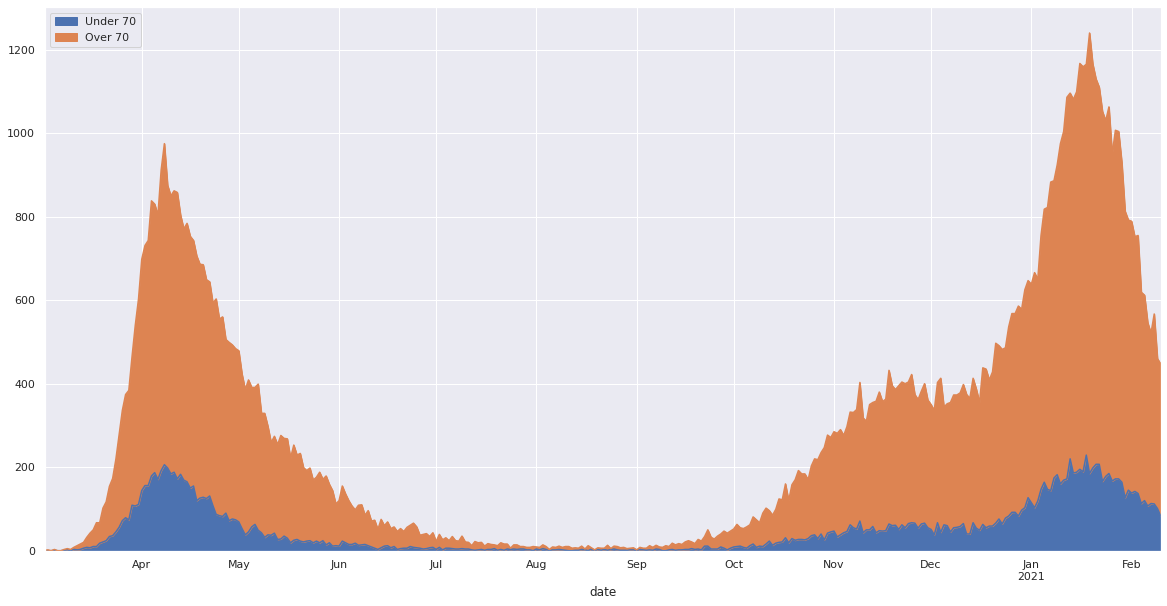

In [4]:
under70 = ['00_04', '05_09', '10_14', '15_19', '20_24', '25_29', '30_34', '35_39', 
           '40_44', '45_49', '50_54', '55_59', '60_64', '65_69']
over70 = ['70_74', '75_79', '80_84', '85_89', '90+']

u=df[df.age.isin(under70)].groupby('date').sum()
o=df[df.age.isin(over70)].groupby('date').sum()
series = pd.concat([
    u.rename(columns={'deaths': 'Deaths: Under 70'}),
    o.rename(columns={'deaths': 'Deaths: Over 70'})], 
    axis=1)

sns.set_theme()
figsize=(20,10)
series.plot.area(figsize=figsize)

We can see in both waves, the majority of deaths were in the over 70s group. 

Just as a clarifying note: this does not mean that the majority of people over 70 getting covid die. In fact this data does not tell us anything about the mortality of the disease. Fortunately, most people getting covid, including the over 70s, recover their health.

Let's now plot the rate of over 70s deaths in the same period.

<AxesSubplot:xlabel='date'>

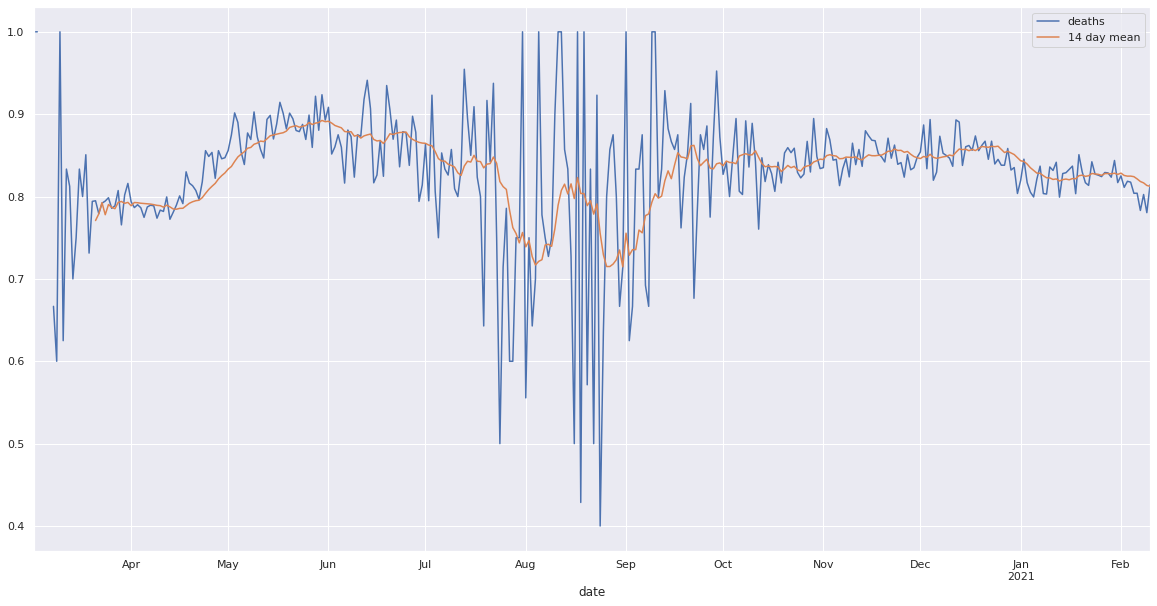

In [5]:
rate=o/(u+o)
data.rename(columns={'gdp':'log(gdp)'}, inplace=True)

rate['14 day mean'] = rate.rolling(14).mean()
rate.plot(figsize=figsize)

We can see that the rate has been quite stable during the whole pandemic. The data in the middle is very noisy. That is to be expected given that during the summer the number of deaths was much much lower. We can see that as soon as the numbers started to grow again, the rate stabilised in about 85%.

Finally let's have a look at the rate since last december, when vaccines started to be used.

<AxesSubplot:xlabel='date'>

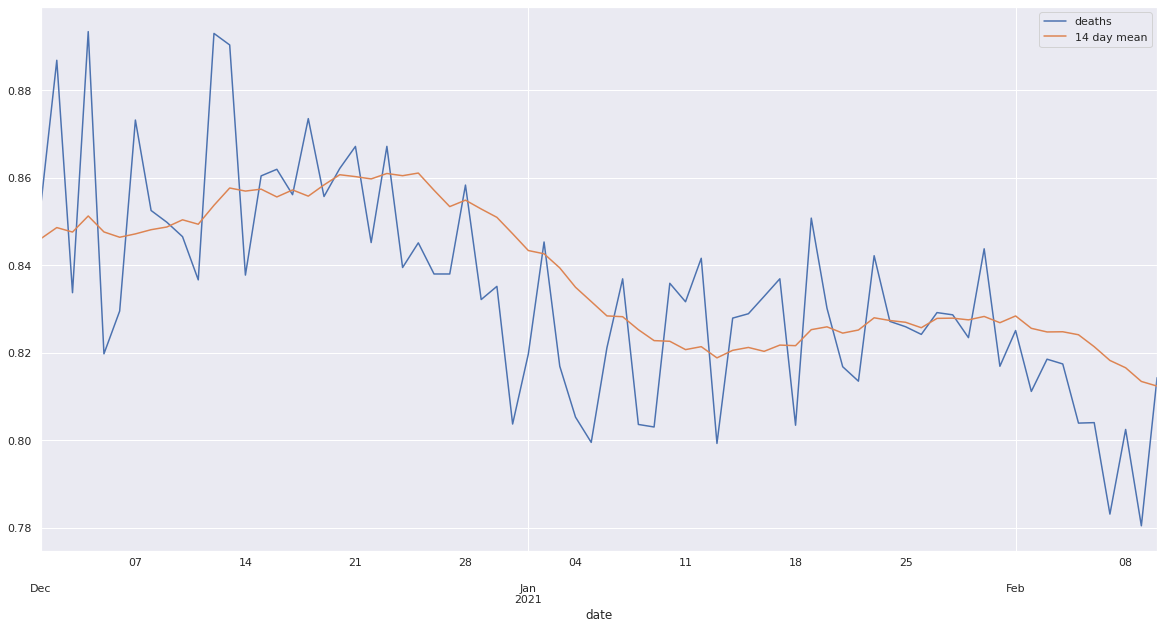

In [8]:
rate = rate[rate.index>='2020-12-01']
rate.plot(figsize=figsize)

Today, 15th Feb, we can see how the general tendency is starting to be downwards, from a peak 86% to a current rate of just above 81%. I would expect to see this trend to continue to go down in the next few weeks. You can check back this page to see how the line looks like with future data.